In [7]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import os

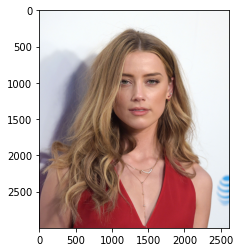

In [43]:
path="E:\C-DAC\Classwork\Linux and Cloud Computing\selenium\Celebrity Recognition Data\Amber_heard\Amber_heard_7.jpg"
img=plt.imread(path)
plt.imshow(img)

In [31]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(3000, 2622)

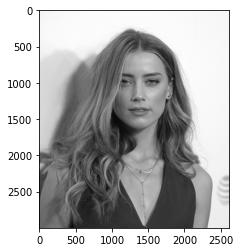

In [32]:
plt.imshow(gray, cmap='gray')

In [33]:
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascade_eye.xml')

In [34]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[896, 594, 980, 980]])

In [35]:
(x,y,w,h) = faces[0]
x,y,w,h

(896, 594, 980, 980)

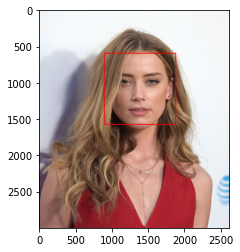

In [45]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
plt.imshow(face_img)

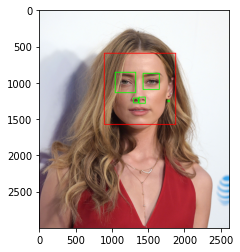

In [39]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),10)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

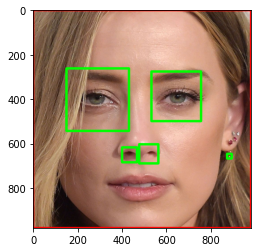

In [40]:
plt.imshow(roi_color, cmap='gray')

In [41]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [44]:
cropped_image = get_cropped_image_if_2_eyes(path)
plt.imshow(cropped_image)

In [ ]:
path2="E:\C-DAC\Classwork\Linux and Cloud Computing\selenium\Celebrity Recognition Data\Amber_heard\Amber_heard_31.jpg"
